#importing all neccesary modules 

In [1]:
import numpy as np
import pandas as pd
import os
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix, roc_auc_score, balanced_accuracy_score
from sklearn.feature_selection import RFE, mutual_info_classif
from sklearn.inspection import permutation_importance
from xgboost import XGBClassifier  # Added import for XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import sparse

# Set random seed for reproducibility

In [2]:
np.random.seed(42)

# Load the dataset

In [3]:
# List input files
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data = pd.read_csv('/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv')

/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv


# Print detailed dataset information

In [4]:
print("\nDataset Shape:", data.shape)
print("\nFeature Descriptions:")
print("- N: Nitrogen content in soil (kg/ha)")
print("- P: Phosphorus content in soil (kg/ha)")
print("- K: Potassium content in soil (kg/ha)")
print("- temperature: Temperature in Celsius")
print("- humidity: Relative humidity in %")
print("- ph: Soil pH value")
print("- rainfall: Rainfall in mm")
print("- NPK: Average of Nitrogen, Phosphorus, and Potassium")
print("- THI: Temperature-Humidity Index (temperature * humidity / 100)")
print("- rainfall_level: Categorical rainfall (Low, Medium, High, Very High)")
print("- ph_category: Categorical pH (Acidic, Neutral, Alkaline)")
print("- temp_rain_interaction: Temperature * Rainfall interaction")
print("- ph_rain_interaction: pH * Rainfall interaction")
print("- soil_fertility_index: Weighted NPK ratio")
print("- season: Seasonal indicator (Winter, Spring, Summer, Monsoon)")
print("- N_P_ratio: Nitrogen to Phosphorus ratio")
print("- N_K_ratio: Nitrogen to Potassium ratio")
print("- log_rainfall: Log-transformed rainfall")
print("- N_times_P: Nitrogen * Phosphorus interaction")
print("- P_times_K: Phosphorus * Potassium interaction")
print("- N_times_K: Nitrogen * Potassium interaction")
print("- env_stress_index: Environmental stress index (temperature, humidity, pH)")
print("- rainfall_ph_interaction: Categorical rainfall * pH interaction")
print("- soil_moisture_proxy: Proxy for soil moisture (humidity * rainfall)")
print("- nutrient_balance_score: Deviation from optimal NPK ratio")
print("- temp_humidity_ratio: Temperature to humidity ratio")
print("- npk_variance: Variance of N, P, K")
print("- ph_temp_interaction: pH * Temperature interaction")
print("- nutrient_availability_index: Normalized nutrient levels")
print("\nStatistical Summary of Numerical Features:")
print(data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].describe())
print("\nClass Distribution (Crop Labels):")
print(data['label'].value_counts())


Dataset Shape: (2200, 8)

Feature Descriptions:
- N: Nitrogen content in soil (kg/ha)
- P: Phosphorus content in soil (kg/ha)
- K: Potassium content in soil (kg/ha)
- temperature: Temperature in Celsius
- humidity: Relative humidity in %
- ph: Soil pH value
- rainfall: Rainfall in mm
- NPK: Average of Nitrogen, Phosphorus, and Potassium
- THI: Temperature-Humidity Index (temperature * humidity / 100)
- rainfall_level: Categorical rainfall (Low, Medium, High, Very High)
- ph_category: Categorical pH (Acidic, Neutral, Alkaline)
- temp_rain_interaction: Temperature * Rainfall interaction
- ph_rain_interaction: pH * Rainfall interaction
- soil_fertility_index: Weighted NPK ratio
- season: Seasonal indicator (Winter, Spring, Summer, Monsoon)
- N_P_ratio: Nitrogen to Phosphorus ratio
- N_K_ratio: Nitrogen to Potassium ratio
- log_rainfall: Log-transformed rainfall
- N_times_P: Nitrogen * Phosphorus interaction
- P_times_K: Phosphorus * Potassium interaction
- N_times_K: Nitrogen * Potassium

# EDA


Top 5 rows of the dataset
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

Bottom 5 rows of the dataset
        N   P   K  temperature   humidity        ph    rainfall   label
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 colu

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

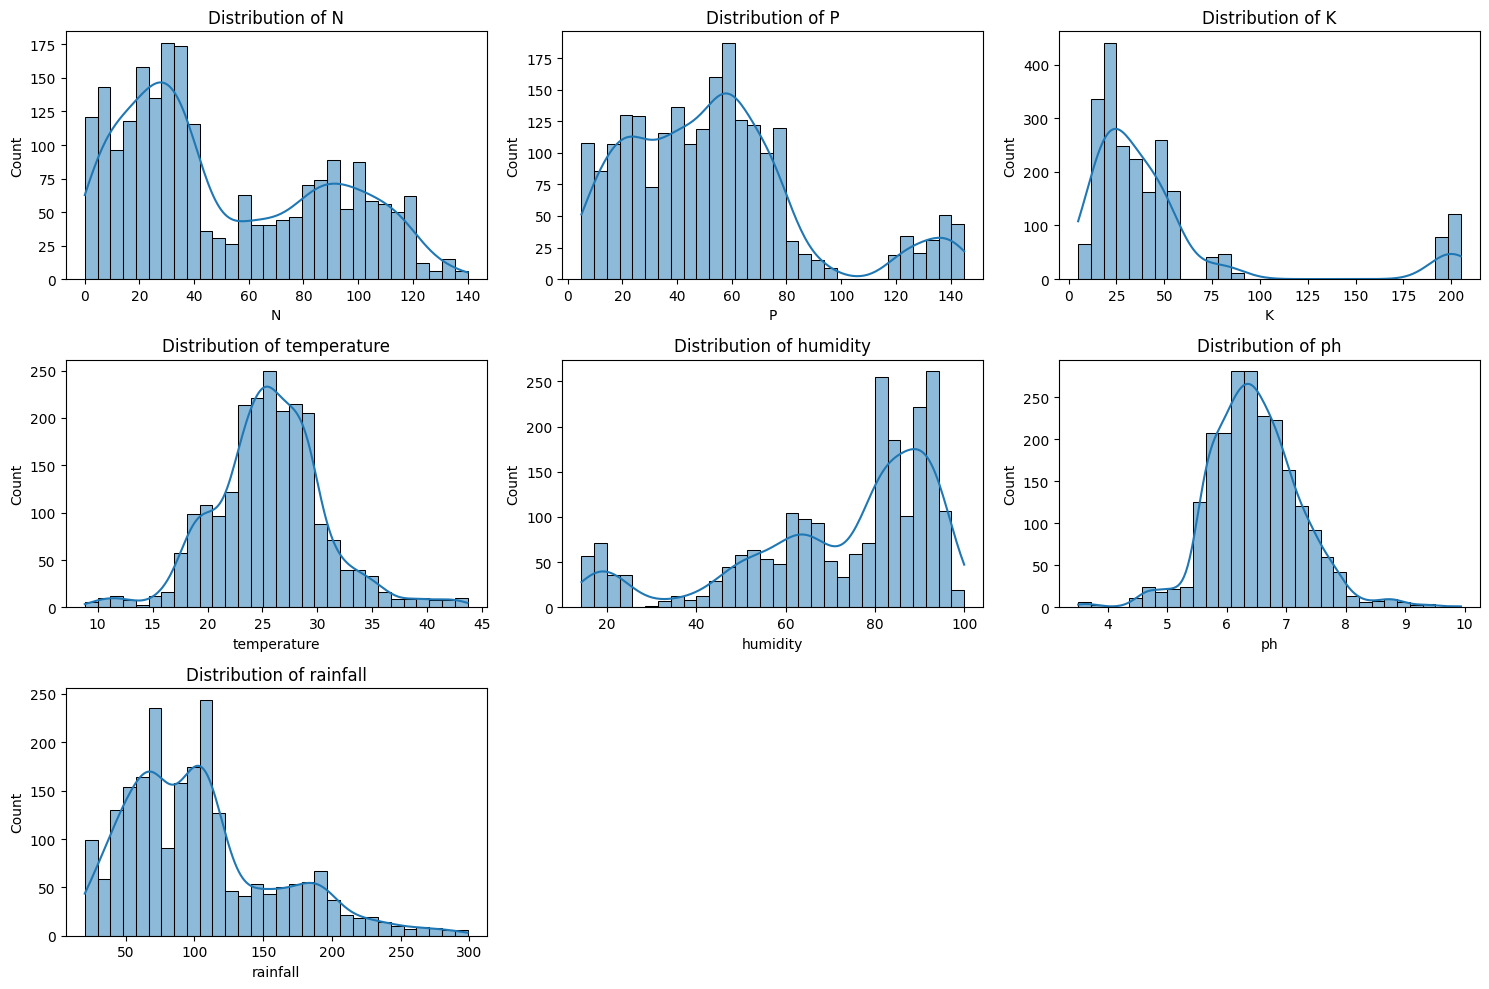

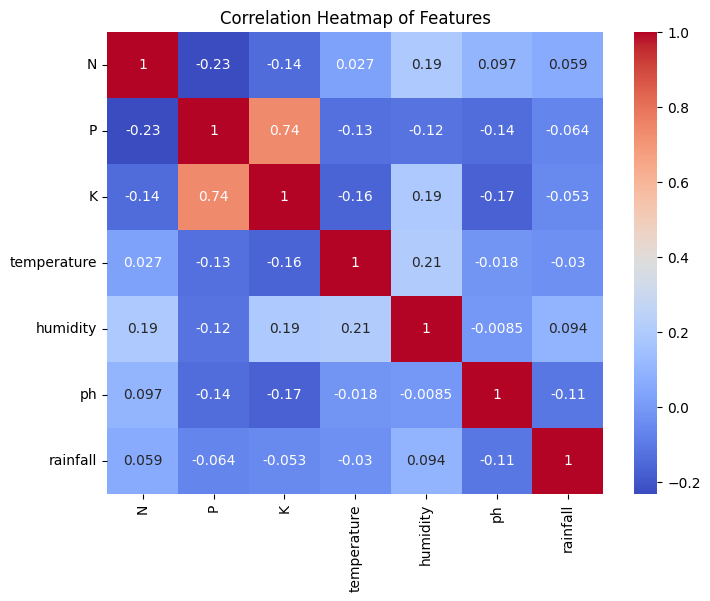

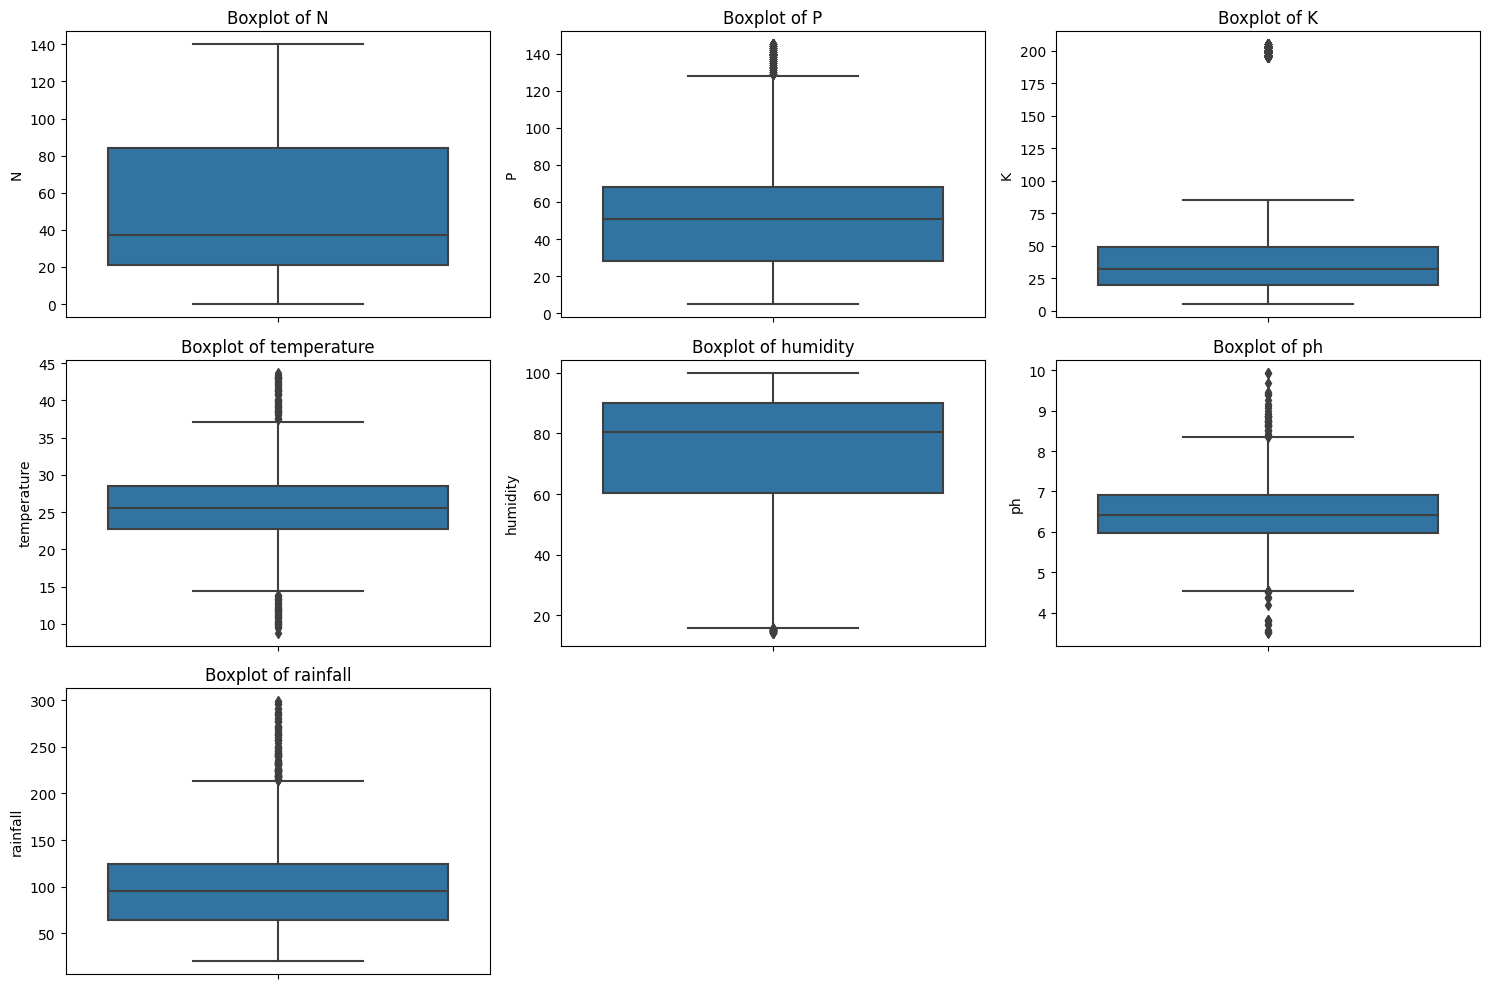

<Figure size 1400x600 with 0 Axes>

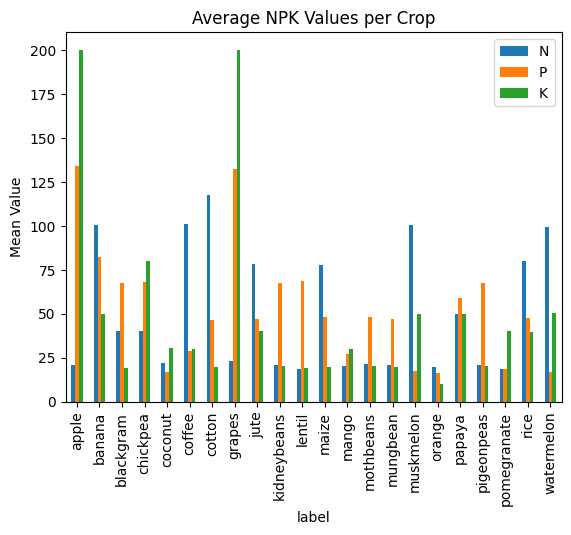

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

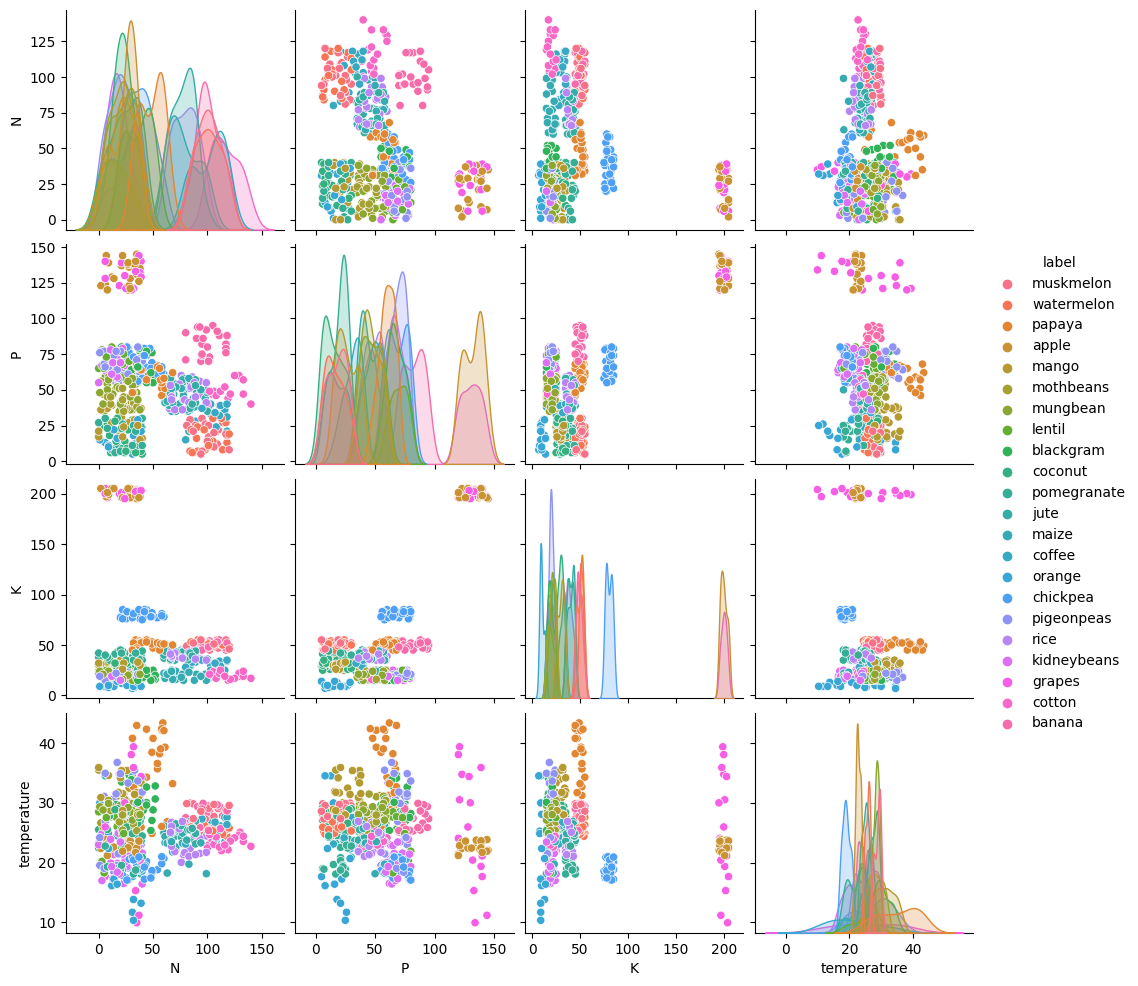

In [5]:
# EDA: Top 5 rows
print("\nTop 5 rows of the dataset")
print(data.head())

# EDA: Bottom 5 rows
print("\nBottom 5 rows of the dataset")
print(data.tail())

# EDA: Dataset info
print("\nDataset Info:")
print(data.info())

# EDA: Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# EDA: Check for duplicates
print("\nDuplicated Rows:")
print(data.duplicated().sum())

# EDA: Unique labels
print("\nUnique Crop Labels:")
print(data['label'].unique())

# EDA: Distribution of numerical features
num_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# EDA: Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data[num_features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()

# EDA: Boxplots for outlier detection
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# EDA: Average NPK values by crop
plt.figure(figsize=(14, 6))
avg_values = data.groupby("label")[['N', 'P', 'K']].mean()
avg_values.plot(kind="bar")
plt.title("Average NPK Values per Crop")
plt.ylabel("Mean Value")
plt.show()

# EDA: Pairplot for sampled data
sample_df = data.sample(500, random_state=42)
sns.pairplot(sample_df, hue="label", vars=['N', 'P', 'K', 'temperature'])
plt.show()

# Feature engineering function

In [6]:
def feature_engineer(data):
    data['NPK'] = (data['N'] + data['P'] + data['K']) / 3
    data['THI'] = data['temperature'] * data['humidity'] / 100
    data['rainfall_level'] = pd.cut(data['rainfall'],
                                    bins=[0, 50, 100, 200, 300],
                                    labels=['Low', 'Medium', 'High', 'Very High'])
    def ph_category(p):
        if p < 5.5:
            return 'Acidic'
        elif p <= 7.5:
            return 'Neutral'
        else:
            return 'Alkaline'
    data['ph_category'] = data['ph'].apply(ph_category)
    data['temp_rain_interaction'] = data['temperature'] * data['rainfall']
    data['ph_rain_interaction'] = data['ph'] * data['rainfall']
    data['soil_fertility_index'] = 0.4 * data['N'] + 0.3 * data['P'] + 0.3 * data['K']
    def get_season(t, r):
        if t < 15 or r < 50:
            return 'Winter'
        elif 15 <= t < 25 and 50 <= r < 100:
            return 'Spring'
        elif t >= 25 and r < 150:
            return 'Summer'
        else:
            return 'Monsoon'
    data['season'] = data.apply(lambda x: get_season(x['temperature'], x['rainfall']), axis=1)
    data['N_P_ratio'] = data['N'] / (data['P'] + 1e-6)
    data['N_K_ratio'] = data['N'] / (data['K'] + 1e-6)
    data['log_rainfall'] = np.log1p(data['rainfall'])
    data['N_times_P'] = data['N'] * data['P']
    data['P_times_K'] = data['P'] * data['K']
    data['N_times_K'] = data['N'] * data['K']
    data['env_stress_index'] = (data['temperature'] / 30 + data['humidity'] / 100 + (7 - data['ph']) / 7) / 3
    data['rainfall_ph_interaction'] = data['rainfall_level'].astype(str) + '_' + data['ph_category'].astype(str)
    data['soil_moisture_proxy'] = data['humidity'] * data['rainfall'] / 100
    data['nutrient_balance_score'] = abs(data['N'] / 100 - data['P'] / 50 - data['K'] / 50)
    data['temp_humidity_ratio'] = data['temperature'] / (data['humidity'] + 1e-6)
    data['npk_variance'] = data[['N', 'P', 'K']].var(axis=1)
    data['ph_temp_interaction'] = data['ph'] * data['temperature']
    data['nutrient_availability_index'] = (data['N'] / 150 + data['P'] / 75 + data['K'] / 75) / 3
    return data

In [7]:
# Apply feature engineering
data = feature_engineer(data)
print("\nTop 5 rows after feature engineering:")
print(data.head())

# Check for NaN/inf values (numeric columns only)
numeric_columns = data.select_dtypes(include=[np.number]).columns
print("\nChecking for NaN values after feature engineering:")
print(data[numeric_columns].isna().sum())
print("\nRows with inf values:")
print(data[numeric_columns][np.isinf(data[numeric_columns]).any(axis=1)])
data[numeric_columns] = data[numeric_columns].replace([np.inf, -np.inf], np.nan).fillna(data[numeric_columns].mean())


Top 5 rows after feature engineering:
    N   P   K  temperature   humidity        ph    rainfall label        NPK  \
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice  58.333333   
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice  61.333333   
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice  53.000000   
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice  49.666667   
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice  54.000000   

         THI  ... P_times_K N_times_K  env_stress_index  \
0  17.121963  ...      1806      3870          0.529007   
1  17.485957  ...      2378      3485          0.507812   
2  18.937446  ...      2420      2640          0.489998   
3  21.234829  ...      1400      2960          0.562473   
4  16.427204  ...      1764      3276          0.465758   

   rainfall_ph_interaction  soil_moisture_proxy nutrient_balance_score  \
0        Very High_Neutral           166.412709    

In [8]:
# Encode categorical variables with separate LabelEncoders
le_target = LabelEncoder()
le_rainfall = LabelEncoder()
le_ph = LabelEncoder()
le_season = LabelEncoder()
le_rainfall_ph = LabelEncoder()
data['label'] = le_target.fit_transform(data['label'])
data['rainfall_level'] = le_rainfall.fit_transform(data['rainfall_level'])
data['ph_category'] = le_ph.fit_transform(data['ph_category'])
data['season'] = le_season.fit_transform(data['season'])
data['rainfall_ph_interaction'] = le_rainfall_ph.fit_transform(data['rainfall_ph_interaction'])

In [9]:
# Handle outliers by clipping
for col in numeric_columns:
    data[col] = np.clip(data[col], data[col].quantile(0.01), data[col].quantile(0.99))

# Ensure original features are preserved for polynomial transformation
X = data.drop('label', axis=1)
core_features = ['N', 'P', 'K', 'temperature']
# Add polynomial features (sparse for efficiency)
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_poly = sparse.csr_matrix(poly.fit_transform(X[core_features]))
poly_feature_names = poly.get_feature_names_out(core_features)
X_poly_df = pd.DataFrame.sparse.from_spmatrix(X_poly, columns=poly_feature_names, index=X.index)
X = pd.concat([X.drop(core_features, axis=1), X_poly_df], axis=1)

In [10]:
# Correlation-based feature selection (exclude core polynomial features)
numerical_features = [col for col in X.columns if col not in ['rainfall_level', 'ph_category', 'season', 'rainfall_ph_interaction']]
corr_matrix = X[numerical_features].corr().abs().replace([np.inf, -np.inf], np.nan).fillna(0)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = []
for column in upper.columns:
    correlated = upper[column][upper[column] > 0.8].index.tolist()
    if correlated and column not in to_drop:
        to_drop.append(correlated[0])
if to_drop:
    print(f"\nDropping high-correlation features: {to_drop}")
    X = X.drop(to_drop, axis=1)


Dropping high-correlation features: ['humidity', 'rainfall', 'rainfall', 'NPK', 'rainfall', 'NPK', 'THI', 'rainfall', 'P_times_K', 'humidity', 'NPK', 'NPK', 'P_times_K', 'NPK', 'ph_temp_interaction', 'N_times_P', 'N_times_K', 'N', 'NPK', 'P', 'NPK']


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(



Mutual Information Scores:
                        Feature  MI Score
12          soil_moisture_proxy  1.669015
17                            K  1.646723
9                  log_rainfall  1.637818
24                K temperature  1.544704
16  nutrient_availability_index  1.418599
22                          P K  1.378194
5          soil_fertility_index  1.370025
4           ph_rain_interaction  1.324214
14          temp_humidity_ratio  1.289992
13       nutrient_balance_score  1.265899
3         temp_rain_interaction  1.214736
23                P temperature  1.174222
20                          N K  1.166817
15                 npk_variance  1.102524
8                     N_K_ratio  1.092330
11      rainfall_ph_interaction  1.073708
7                     N_P_ratio  1.039376
18                  temperature  1.015929
10             env_stress_index  0.993742
21                N temperature  0.906952
19                          N P  0.868518
1                rainfall_level  0.853948
6     

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(



Selected Features after RFE: ['soil_moisture_proxy', 'K', 'log_rainfall', 'nutrient_availability_index', 'soil_fertility_index', 'ph_rain_interaction', 'temp_humidity_ratio', 'nutrient_balance_score']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(



Best RandomForest Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Model and preprocessing objects exported as 'ensemble_model.joblib', 'scaler.joblib', 'label_encoder_*.joblib', 'poly_transformer.joblib', 'rfe_selector.joblib'

RandomForestClassifier Parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

Model File Size: 20590.57 KB

accuracy score: 0.9772727272727273
mean_squared_error: 2.081818181818182
classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      0.9

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

Cross-validation accuracy: 0.9809 +/- 0.0057

ROC-AUC Score (One-vs-Rest): 0.9999

Permutation Importance:
                       Feature  Importance
0          soil_moisture_proxy    0.107727
1                            K    0.165000
2                 log_rainfall    0.141591
3  nutrient_availability_index    0.050227
4         soil_fertility_index    0.041364
5          ph_rain_interaction    0.004091
6          temp_humidity_ratio    0.030227
7       nutrient_balance_score    0.089773


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(



Feature Stability (Std Dev of Importances across CV Folds):
                       Feature  Importance Std
0          soil_moisture_proxy        0.004234
1                            K        0.004163
2                 log_rainfall        0.004608
3  nutrient_availability_index        0.003163
4         soil_fertility_index        0.004848
5          ph_rain_interaction        0.004139
6          temp_humidity_ratio        0.005096
7       nutrient_balance_score        0.002455


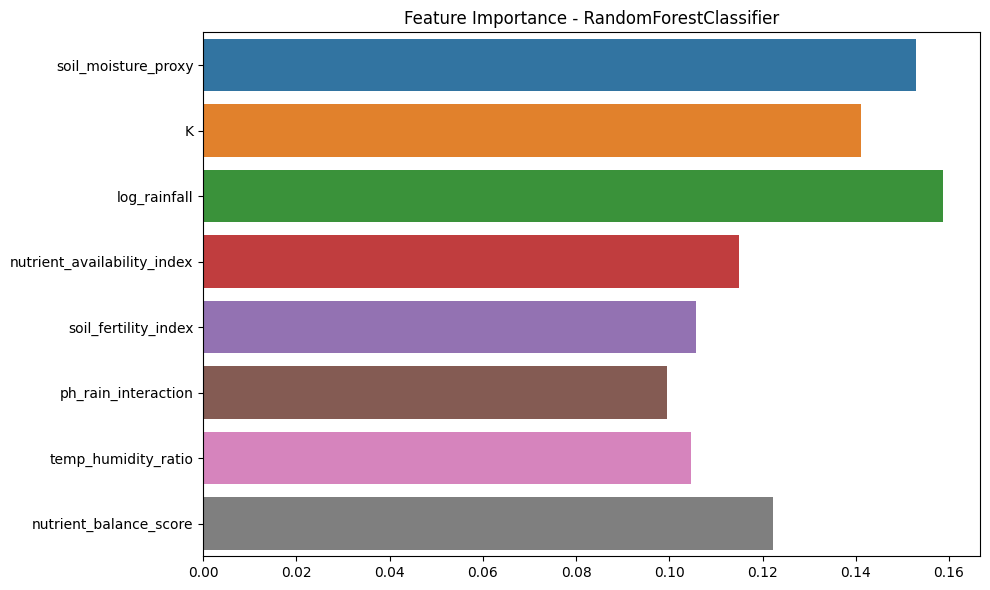

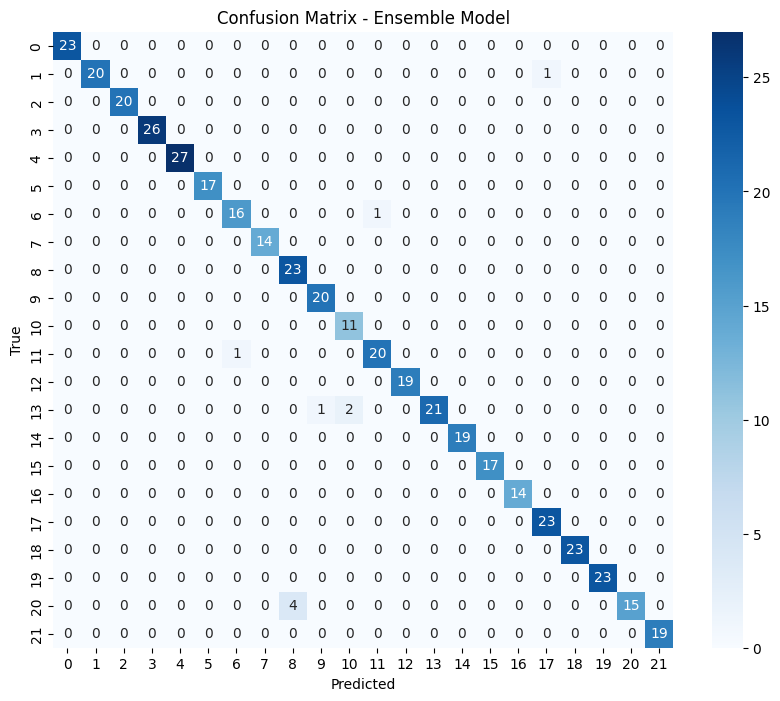

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

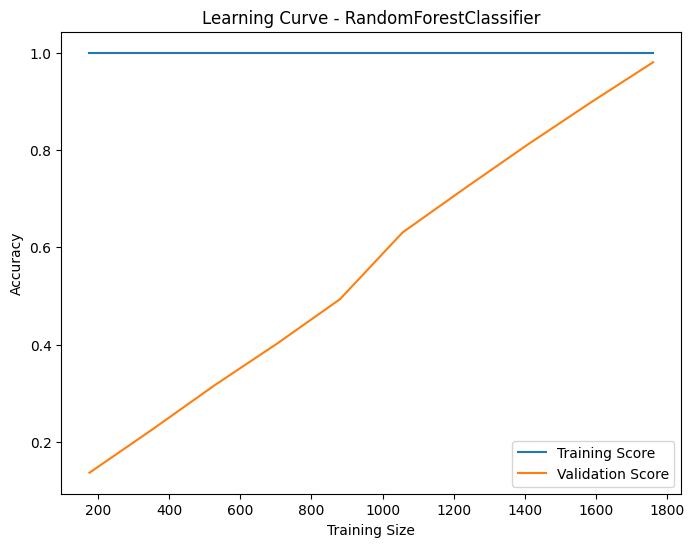


Misclassified Instances (Sample):
   soil_moisture_proxy         K  log_rainfall  nutrient_availability_index  \
0             1.696149 -0.257843      1.457770                     0.014243   
1            -1.046701 -0.473438     -1.586884                    -0.432477   
2             0.050041 -0.591035      0.078382                    -0.277096   
3            -0.908672 -0.473438     -0.466895                    -0.413055   
4             0.210389 -0.022648      0.302051                     0.402696   

   soil_fertility_index  ph_rain_interaction  temp_humidity_ratio  \
0              0.341708             1.539766            -0.633480   
1             -0.649630            -1.144808             0.223652   
2              0.242969             0.147715            -0.630456   
3             -0.542992            -0.892807             1.448035   
4              0.657673            -0.031761            -0.353250   

   nutrient_balance_score true_label predicted_label  
0               -0.3

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [11]:
# Mutual information-based feature selection
mi_scores = mutual_info_classif(X, data['label'], random_state=42)
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)
print("\nMutual Information Scores:")
print(mi_df)
# Select top 15 features based on MI scores
selected_features = mi_df['Feature'].head(15).tolist()
X = X[selected_features]

# Recursive Feature Elimination (RFE)
rfe = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=8)
X = X.loc[:, rfe.fit(X, data['label']).support_]
print("\nSelected Features after RFE:", X.columns.tolist())

# Split features and target
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter tuning for RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 15],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 2]
}
rfc = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
rfc = grid_search.best_estimator_
print("\nBest RandomForest Parameters:", grid_search.best_params_)

# Train ensemble model with tuned weights
svm = SVC(kernel='rbf', probability=True, random_state=42)
xgb = XGBClassifier(random_state=42)
ensemble = VotingClassifier(estimators=[
    ('rf', rfc), ('svm', svm), ('xgb', xgb)], voting='soft', weights=[0.5, 0.3, 0.2])
ensemble.fit(X_train, y_train)

# Export model and preprocessing objects
joblib.dump(ensemble, 'ensemble_model.joblib')
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(le_target, 'label_encoder_target.joblib')
joblib.dump(le_rainfall, 'label_encoder_rainfall.joblib')
joblib.dump(le_ph, 'label_encoder_ph.joblib')
joblib.dump(le_season, 'label_encoder_season.joblib')
joblib.dump(le_rainfall_ph, 'label_encoder_rainfall_ph.joblib')
joblib.dump(poly, 'poly_transformer.joblib')
joblib.dump(rfe, 'rfe_selector.joblib')
print("\nModel and preprocessing objects exported as 'ensemble_model.joblib', 'scaler.joblib', 'label_encoder_*.joblib', 'poly_transformer.joblib', 'rfe_selector.joblib'")

# Print model parameters and size
print("\nRandomForestClassifier Parameters:")
print(rfc.get_params())
model_size = os.path.getsize('ensemble_model.joblib') / 1024  # Size in KB
print(f"\nModel File Size: {model_size:.2f} KB")

# Evaluate ensemble model
y_pred = ensemble.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f'\naccuracy score: {accuracy}')
print(f'mean_squared_error: {mse}')
print(f'classification report:\n{class_report}')
print(f'balanced accuracy score: {balanced_acc:.4f}')

# Perform 5-fold cross-validation
cv_scores = cross_val_score(ensemble, X, y, cv=5, scoring='accuracy')
print(f'Cross-validation accuracy: {cv_scores.mean():.4f} +/- {cv_scores.std():.4f}')

# ROC-AUC score (one-vs-rest for multi-class)
y_score = ensemble.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_score, multi_class='ovr')
print(f"\nROC-AUC Score (One-vs-Rest): {roc_auc:.4f}")

# Permutation importance
perm_importance = permutation_importance(rfc, X_test, y_test, n_repeats=10, random_state=42)
print("\nPermutation Importance:")
print(pd.DataFrame({'Feature': X.columns, 'Importance': perm_importance.importances_mean}))

# Feature stability across CV folds
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
feature_importances = []
for train_idx, _ in kf.split(X):
    rfc.fit(X.iloc[train_idx], y.iloc[train_idx])
    feature_importances.append(rfc.feature_importances_)
feature_stability = np.std(feature_importances, axis=0)
print("\nFeature Stability (Std Dev of Importances across CV Folds):")
print(pd.DataFrame({'Feature': X.columns, 'Importance Std': feature_stability}))

# Visualize feature importance (for RandomForest)
importances = rfc.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance - RandomForestClassifier')
plt.tight_layout()
plt.show()

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Ensemble Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(rfc, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - RandomForestClassifier')
plt.legend()
plt.show()

# Error analysis
errors = pd.DataFrame(X_test[y_test != y_pred], columns=feature_names)
errors['true_label'] = le_target.inverse_transform(y_test[y_test != y_pred])
errors['predicted_label'] = le_target.inverse_transform(y_pred[y_test != y_pred])
print("\nMisclassified Instances (Sample):")
print(errors.head())

# Function to predict crop for real-world input with validation
def predict_crop(new_data, model, scaler, le_target, le_rainfall, le_ph, le_season, le_rainfall_ph, poly_transformer, rfe_selector):
    required_columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
    if not all(col in new_data.columns for col in required_columns):
        raise ValueError(f"Input data must contain columns: {required_columns}")
    for col, (min_val, max_val) in {'N': (0, 200), 'P': (0, 200), 'K': (0, 200), 
                                    'temperature': (0, 50), 'humidity': (0, 100), 
                                    'ph': (0, 14), 'rainfall': (0, 500)}.items():
        if (new_data[col] < min_val).any() or (new_data[col] > max_val).any():
            raise ValueError(f"{col} values must be between {min_val} and {max_val}")
    new_data = feature_engineer(new_data)
    new_data = new_data.drop('label', axis=1, errors='ignore')
    # Use fitted encoders instead of re-fitting
    try:
        new_data['rainfall_level'] = le_rainfall.transform(new_data['rainfall_level'])
    except ValueError:
        new_data['rainfall_level'] = le_rainfall.fit_transform(new_data['rainfall_level'])
    try:
        new_data['ph_category'] = le_ph.transform(new_data['ph_category'])
    except ValueError:
        new_data['ph_category'] = le_ph.fit_transform(new_data['ph_category'])
    try:
        new_data['season'] = le_season.transform(new_data['season'])
    except ValueError:
        new_data['season'] = le_season.fit_transform(new_data['season'])
    try:
        new_data['rainfall_ph_interaction'] = le_rainfall_ph.transform(new_data['rainfall_ph_interaction'])
    except ValueError:
        new_data['rainfall_ph_interaction'] = le_rainfall_ph.fit_transform(new_data['rainfall_ph_interaction'])
    new_data[numeric_columns] = new_data[numeric_columns].replace([np.inf, -np.inf], np.nan).fillna(new_data[numeric_columns].mean())
    new_data_poly = sparse.csr_matrix(poly_transformer.transform(new_data[core_features]))
    new_data_poly_df = pd.DataFrame.sparse.from_spmatrix(new_data_poly, columns=poly_transformer.get_feature_names_out(core_features), index=new_data.index)
    new_data = pd.concat([new_data.drop(core_features, axis=1), new_data_poly_df], axis=1)
    if to_drop:
        new_data = new_data.drop([col for col in to_drop if col in new_data.columns], axis=1)
    # Ensure feature consistency
    missing_cols = [col for col in selected_features if col not in new_data.columns]
    if missing_cols:
        raise ValueError(f"Missing features in new data: {missing_cols}")
    new_data = new_data[selected_features]
    new_data = new_data.loc[:, rfe_selector.support_]
    new_data_scaled = scaler.transform(new_data)
    prediction = model.predict(new_data_scaled)
    confidence = model.predict_proba(new_data_scaled)
    predicted_crop = le_target.inverse_transform(prediction)
    return predicted_crop, np.max(confidence, axis=1)

# Simulate real-world input
real_world_data = pd.DataFrame({
    'N': [80, 90, 70], 'P': [40, 50, 45], 'K': [40, 45, 50], 
    'temperature': [25, 20, 30], 'humidity': [80, 70, 85], 
    'ph': [6.5, 6.0, 7.0], 'rainfall': [150, 100, 200]
})
predicted_crop, confidence = predict_crop(real_world_data, ensemble, scaler, le_target, le_rainfall, le_ph, le_season, le_rainfall_ph, poly, rfe)
print("\nReal-World Predictions:")
for i, (crop, conf) in enumerate(zip(predicted_crop, confidence)):
    print(f"Input {i+1}: Crop = {crop}, Confidence = {conf:.4f}")